---
# <center> *Machine Learning*
## <center> Regression Example
---

In [12]:
# Step 1: Load the uploaded housing prices CSV
import pandas as pd

file_path = "housing_prices.csv"
housing_df = pd.read_csv(file_path)

# Display first few rows
housing_df.head()

,Unnamed: 0,Land Square Feet,Central Heating,Other Heating,Central Air,Fireplaces,Construction Quality,Site Desirability,Porch,Building Square Feet,Repair Condition,Estimate (Land),Estimate (Building),Sale Price,Age,O'Hare Noise,Sale Year,Garage Indicator,Bedrooms,Bathrooms
0,0,3780.0,2.0,5.0,0.0,1.0,2.0,2.0,1,997.0,2.0,49140,177500,285000,96,0.0,2018,1.0,3,1
1,1,4375.0,1.0,5.0,0.0,0.0,2.0,2.0,3,907.0,2.0,26250,63470,22000,112,0.0,2016,1.0,3,1
2,2,4375.0,1.0,5.0,1.0,1.0,2.0,2.0,3,1174.0,2.0,29530,194430,225000,63,0.0,2013,1.0,3,1
3,3,8400.0,2.0,5.0,0.0,0.0,2.0,2.0,3,949.0,2.0,23100,30160,22600,63,0.0,2016,1.0,2,1
4,4,10890.0,1.0,5.0,1.0,0.0,2.0,2.0,3,1734.0,2.0,35390,65450,100000,109,0.0,2017,1.0,4,1


## Step 1: Exploring the Housing Dataset

Before building any model, it's important to understand what your data looks like.

### Questions to Ask:
- How many rows and columns are there?
- What features (columns) do we have?
- Are there missing values?
- What is the distribution of each feature?
- What does the target variable (`Sale Price`) look like?

Let's find out.


In [13]:
# Basic dataset shape and types
print("Shape:", housing_df.shape)
print("\nColumn types:\n", housing_df.dtypes)

# Check for missing values
print("\nMissing values:\n", housing_df.isnull().sum())


Shape: (158322, 20)

Column types:
 Unnamed: 0                int64
Land Square Feet        float64
Central Heating         float64
Other Heating           float64
Central Air             float64
Fireplaces              float64
Construction Quality    float64
Site Desirability       float64
Porch                     int64
Building Square Feet    float64
Repair Condition        float64
Estimate (Land)           int64
Estimate (Building)       int64
Sale Price                int64
Age                       int64
O'Hare Noise            float64
Sale Year                 int64
Garage Indicator        float64
Bedrooms                  int64
Bathrooms                 int64
dtype: object

Missing values:
 Unnamed: 0              0
Land Square Feet        0
Central Heating         0
Other Heating           0
Central Air             0
Fireplaces              0
Construction Quality    0
Site Desirability       0
Porch                   0
Building Square Feet    0
Repair Condition        0
Estima

## Step 2: Visualize Key Features

Let’s look at distributions of numeric features and how they relate to the target (`Sale Price`).

This helps us:
- Spot skewness or outliers
- Decide which variables may be useful


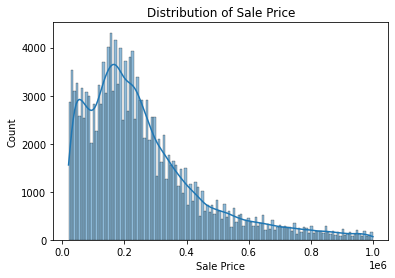

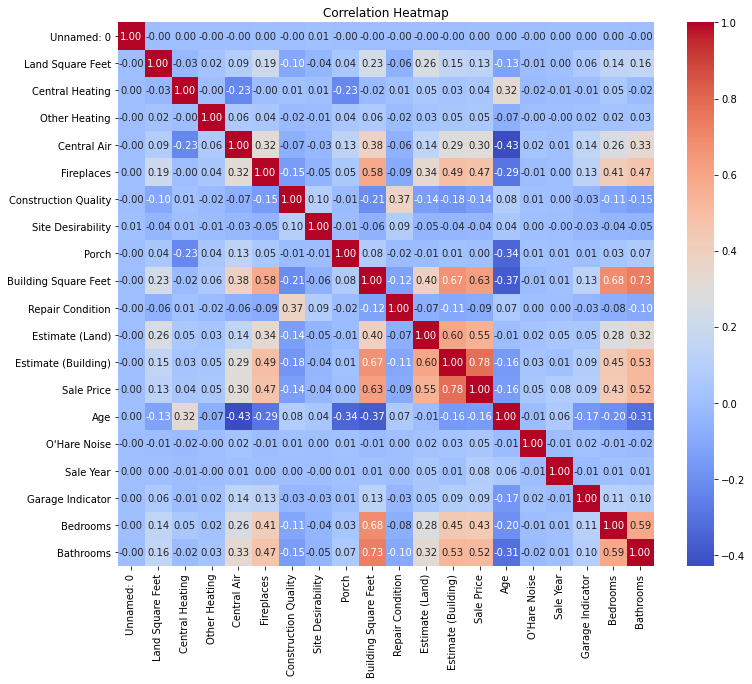

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Sale Price
plt.figure(figsize=(6,4))
sns.histplot(housing_df["Sale Price"], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(housing_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [32]:
# Drop columns we won’t use and select relevant predictors
features = ["Sale Year","Bedrooms", "Porch"]
X = housing_df[features]
y = housing_df["Sale Price"]

## Step 4: Fit a Linear Regression Model

We’ll split the data into training and test sets, fit a regression model, and check how well it performs.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.18978179093654335
MSE: 29560514599.667976


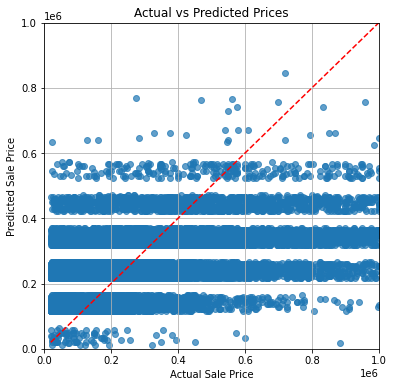

In [34]:
# Plot actual vs predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()


Let’s investigate which numeric variables correlate best with Sale Price.

In [27]:
# Sort numeric correlations with Sale Price
numeric_corrs = housing_df.corr(numeric_only=True)["Sale Price"].sort_values(ascending=False)
print(numeric_corrs)


Sale Price              1.000000
Estimate (Building)     0.780469
Building Square Feet    0.625556
Estimate (Land)         0.551343
Bathrooms               0.519795
Fireplaces              0.474099
Bedrooms                0.434205
Central Air             0.300332
Land Square Feet        0.125794
Garage Indicator        0.093772
Sale Year               0.079713
Other Heating           0.052084
O'Hare Noise            0.045176
Central Heating         0.040032
Porch                   0.003712
Unnamed: 0              0.001152
Site Desirability      -0.037894
Repair Condition       -0.091924
Construction Quality   -0.143686
Age                    -0.155122
Name: Sale Price, dtype: float64


In [35]:
# Drop columns we won’t use and select relevant predictors
features = ["Estimate (Building)","Building Square Feet", "Estimate (Land)", "Bathrooms"]
X = housing_df[features]
y = housing_df["Sale Price"]

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.6348444611500432
MSE: 13322566089.696917


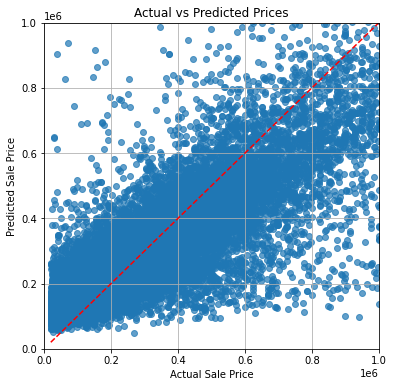

In [37]:
# Plot actual vs predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()


## Polynomial Features in Regression

Sometimes, the relationship between features and the target isn't linear.

For example:  
- Doubling the square footage doesn't always double the price.
- The effect of bathrooms might depend on the size of the house.

To model such **nonlinear relationships** using linear regression, we can **create new features** by multiplying existing ones or raising them to a power.

---

### What `PolynomialFeatures` Does

If we start with 2 features:  
- $x_1$ = size  
- $x_2$ = bathrooms  

PolynomialFeatures (degree = 2) will generate:  
- $x_1$, $x_2$ (originals)  
- $x_1^2$, $x_2^2$ (squares)  
- $x_1 \cdot x_2$ (interaction)

This gives the model more flexibility without changing the underlying algorithm.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select features and target
features = ["Estimate (Building)", "Building Square Feet", "Estimate (Land)", "Bathrooms"]
X = housing_df[features]
y = housing_df["Sale Price"]

# Step 2: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Optional: scale features to improve numerical stability
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Step 4: Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.7000695376937492
MSE: 10942853061.939384


## How Did We Do?

- The $R^2$ score tells us how much of the variance in sale price is explained by our model.
- A higher value (close to 1) is better.
- MSE shows average prediction error — lower is better.

By using polynomial features, our model can:
- Capture interactions between square footage and other features.
- Model curved relationships that simple linear models miss.

✅ This is a simple way to model nonlinear patterns without using complex models like trees or neural networks.


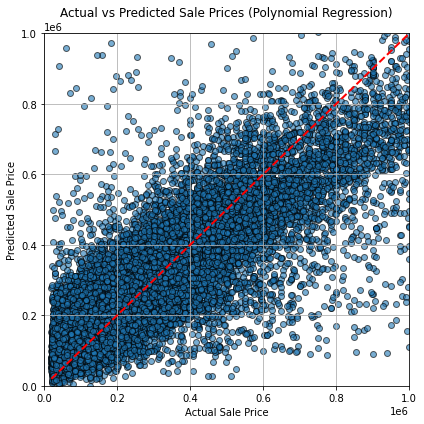

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()